In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pe
import scipy.stats as stats
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer


# PART A

In [2]:
#The following are the ages of 30 customers who ordered an EV scooter from Zen
#Automotives.ee.

age = pd.Series([42, 44, 62, 35, 20, 30, 56, 20, 23, 41, 55, 22, 31, 27, 66, 21, 18, 24, 42, 25, 32, 50, 31, 26, 36, 39, 40, 18, 36, 22])
age

0     42
1     44
2     62
3     35
4     20
5     30
6     56
7     20
8     23
9     41
10    55
11    22
12    31
13    27
14    66
15    21
16    18
17    24
18    42
19    25
20    32
21    50
22    31
23    26
24    36
25    39
26    40
27    18
28    36
29    22
dtype: int64

In [3]:
# Q1. Compute the mean, median and the mode of the data
print('Mean age of Customers = ',round(age.mean(),2))
print('Median age of Customers = ',round(age.median(),2))
print('Mode :\n',round(age.mode(),2))

Mean age of Customers =  34.47
Median age of Customers =  31.5
Mode :
 0    18
1    20
2    22
3    31
4    36
5    42
dtype: int64


In [4]:
# Q2. Compute the range , variance and standard deviation of customer ages

print('Range:',age.max() - age.min())
print('variance:',round(age.var(),2))
print("Standard Deviation:",round(age.std(),2))

Range: 48
variance: 177.36
Standard Deviation: 13.32


In [5]:
# Find the mean deviation for the data . The mean deviation is defined as below.
print(sum(age - age.mean())/len(age))

-1.8947806286936005e-15


In [6]:
# Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data

coe_ske = (3*(age.mean() - age.median()))/age.std()
coe_ske           

0.6682839651739889

In [7]:
# age is positively skewed 

In [8]:
#Q5. Count the number of data values that fall within two standard deviations of
# the mean. Compare this with the answer from Chebyshev’s Theorem.

age_mean = age.mean()
age_std = age.std()
data  = age[(age <= age_mean + 2 * (age_std)) & (age >= age_mean - 2 * (age_std))  ]
len(data)

28

In [9]:
percent = 1 - (1/(2**2))
percent 

0.75

In [10]:
len(data)/len(age)

0.9333333333333333

In [11]:
# Chebyshev’s Theorem states that minimun values within 2 standard deviation ins 75 percent
# while the actual data within the 2 standard deviation is 93.33 percent Theorem they hold true

In [12]:
#Q6 Find the three quartiles and the interquartile range (IQR)
print('Q1:',age.quantile(0.25))
print('Q2:',age.quantile(0.5))
print('Q3:',age.quantile(0.75))

IQR = age.quantile(0.75) - age.quantile(0.25)
print('Interquartile Range :',IQR)

Q1: 23.25
Q2: 31.5
Q3: 41.75
Interquartile Range : 18.5


In [13]:
# Q7. Are there any outliers in the data set ?
ul = age.quantile(0.75) + (1.5 * IQR)
ll = age.quantile(0.25) - (1.5 * IQR)

outliers = age[((age>= ul) | (age <= ll))]
outliers

Series([], dtype: int64)

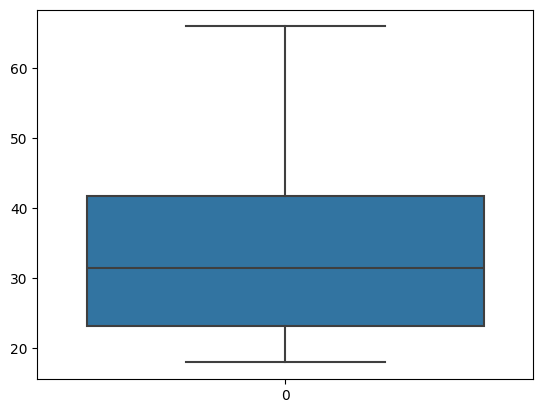

In [14]:
#Q8. Draw a boxplot of the dataset to confirm .
sns.boxplot(age)
plt.show()

In [15]:
# Find the percentile rank of the datapoint 50.

stats.percentileofscore(age, 50)

86.66666666666667

In [16]:
# Q10. What is the probability that a person ordering an EV scooter is above 50 years old?


mean = age.mean()
std = age.std()
x = 50

stats.norm.sf(x,mean,std)

0.12173279104238727

<Axes: ylabel='Count'>

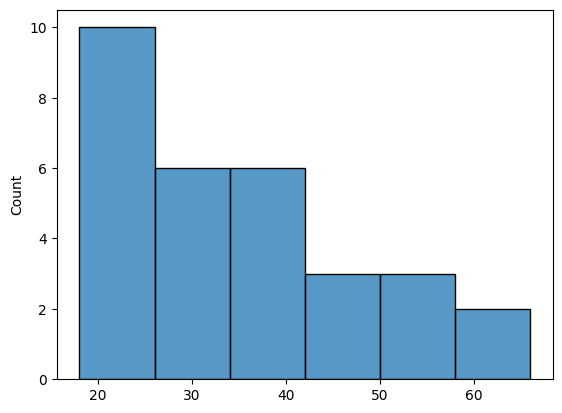

In [17]:
#Q11. Create a frequency distribution for the data and visualize it appropriately

sns.histplot(age)

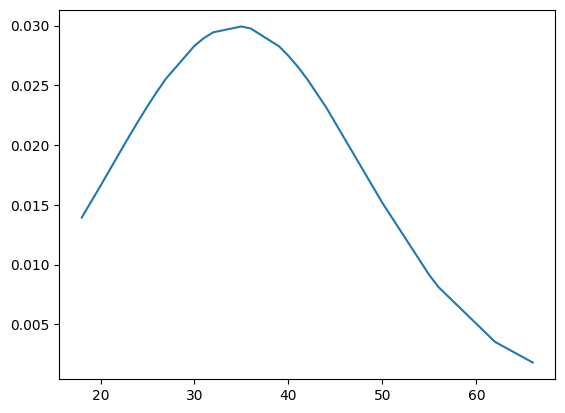

In [18]:
#Q12.Create a probability distribution of the data and visualize it appropriately.
pdf = stats.norm.pdf(age.sort_values(),age.mean(),age.std())
plt.plot(age.sort_values(),pdf)
plt.show()

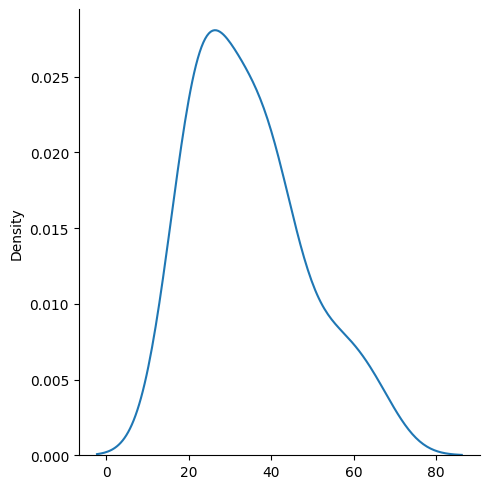

In [19]:
#Q13. What is the shape of the distribution of this dataset? Create an
# appropriate graph to determine that. Take 100 random samples with
# replacement from this dataset of size 5 each. Create a sampling distribution of
# the mean age of customers. Compare with other sampling distributions of
# sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate
# the Central Limit Theorem?

# It is an Positively Skewed dataset
sns.displot(age,kind='kde')

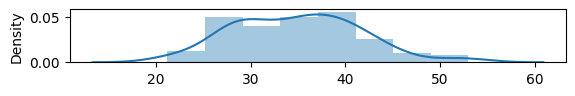

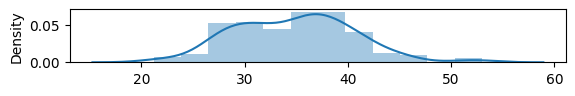

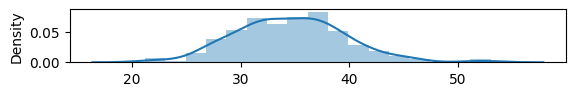

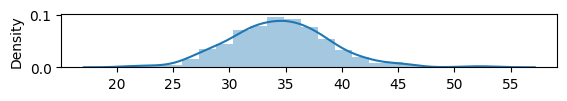

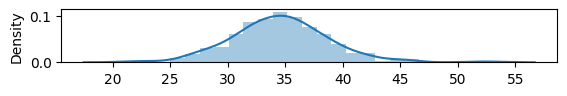

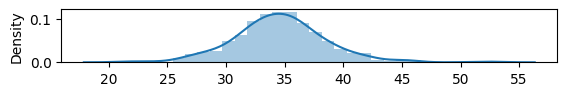

In [20]:
random.seed(0)
n_samples = 100

sample_means = []
size = [5,10, 15, 20, 25, 30]
for x,y in enumerate(size):
    for i in range(n_samples):
        sample= random.choices(age ,k = y ) 
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    plt.subplot(len(size),1,x+1)
    sns.distplot(sample_means)
    plt.show()

In [21]:
# Q14. Treat this dataset as a binomial distribution where p is the probability
# that a person ordering an EV is above 50 years age. What is the probability
# that out of a random sample of 10 buyers exactly 6 are above 50 years of
# age?

mean = age.mean()
std = age.std()
x = 50
p  = stats.norm.sf(x,mean,std)


n = 10
i = 6

stats.binom.pmf(i,n,p)

0.0004066038105388779

In [22]:
# Q15. A study claims that 10% of all customers for an EV scooter are above 50
# years of age. Using the Normal approximation of a Binomial distribution, find
# the probability that in a random sample of 300 prospective customers exactly
# 25 will be above 50 years of age.
# [ Note that the normal distribution can be used to approximate a binomial
# distribution if np>=5 and nq>=5 with the following correction for continuity
# P(X=z) = P(z-0.5 < X < z+0.5 ) ]

p= 0.10

n = 300

n_p = n * p
print(n_p)

n_q = n*(1-p)
print(n_q)

x = 25

sigma = np.sqrt(n*p*(1-p))
sigma


x1 = (x-0.5)
x2 = (x+0.5)

z1 = (x1-(n_p))/sigma
z2 = (x2-(n_p))/sigma


stats.norm.cdf(z2) - stats.norm.cdf(z1)


30.0
270.0


0.04831875658186224

In [23]:
stats.binom.pmf(25,300,0.10)

0.0509860415314796

In [24]:
#Q16 Compute a 95% Confidence Interval for the true mean age of the
# population of EV scooter buyers for the dataset using appropriate distribution.(
# State reasons as to why did you use a z or t distribution)

n = len(age)
n

30

 Since the sample size is equal to 30.The central limit theorem states that the sampling distribution of mean follows a normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt(n)}$.

In [25]:
n = len(age)
x_bar = age.mean()
s = age.std()

In [26]:
z_alpha_by_2  = stats.norm.isf(0.025)

num1 = x_bar - (z_alpha_by_2 *(s/np.sqrt(n)))

num2 = x_bar + (z_alpha_by_2 *(s/np.sqrt(n)))

print('Interval', num1, num2)

Interval 29.70107936877694 39.2322539645564


Q17. A data scientist wants to estimate with 95% confidence the proportion of
people who own an EV in the population. A recent study showed that 20% of
people interviewed had an EV. The data scientist wants to be accurate within
2% of the true proportion. Find the minimum sample size necessary.

In [27]:
p =0.20
margin_of_error = 0.02


z_alpha_by_2  = stats.norm.isf(0.025)

samplesize = ((z_alpha_by_2/margin_of_error )** 2)  * p * (1-p)
print('The Required minimum sample Size :',round(samplesize))

The Required minimum sample Size : 1537


Q18. The same data scientist wants to estimate the proportion of executives
who own an EV. She wants to be 90% confident and accurate within 5% of
true proportion. Find the minimum sample size necessary.

In [28]:
p =0.20
margin_of_error = 0.05


z_alpha_by_2  = stats.norm.isf(0.05)

samplesize = ((z_alpha_by_2/margin_of_error )** 2)  * p * (1-p)
print('The Required minimum sample Size :',round(samplesize))

The Required minimum sample Size : 173


Q19. A researcher claims that currently 20% of the population are owning
EVs. Test his claim with an alpha =0.05 if out of a random sample of 30
two-wheeler owners only 5 own an EV.

In [29]:
p_pop = 0.20

p_samp = 5/30

n = 30

# ho : population who owns EV  p_pop = 0.20
# h1 : population who owns EV  p_pop != 0.20

z_prop = (p_samp - p_pop) / ((p_pop)*(1 - p_pop)/n)**0.5
z_prop

-0.4564354645876386

In [30]:
zcritical = stats.norm.ppf(0.025)
zcritical

-1.9599639845400545

In [31]:
p_value = 2*(stats.norm.sf(abs(z_prop)))
p_value

0.648076868139146

In [32]:
# pvalue > alpha
# fail to reject Null hypothesis
#Currently 20% of the population are owning EV

Q20. Assume you are working for a Consumer Protection Agency that looks at
complaints raised by customers for the transportation industry. Say you have
been receiving complaints about the mileage of the latest EV launched by the
Zen Automotives. Zen allows you to test randomly 40 of its new EVs to test
mileage. Zen claims that the new EVs get a mileage of 96 kmpl on the
highway. Your results show a mean of 91.3 kmpl and a standard deviation of
14.4.

a. Show why you support Zen’s claim using the P-value obtained.

b. After more complaints you decide to test the variability of the mileage on
the highway. On questioning Zen’s quality control engineer , you find
that they are claiming a standard deviation of 7.2. Test the claim about
the standard deviation. [Hint :use the Chi-square test for
variance/standard deviation]

c. Write a summary of results and the action that Zen must take to remedy
the complaints.

d. What is your position on performing the test for variability along with the
test for means?

In [33]:
mu = 96
x_bar = 91.3
s = 14.4
n = 40

# Since the sample size n > 30 , we can assume the  data to be normal
# so take s as sigma for calculation as population standard deviation is not known

# ho: mu >= 96
# h1: mu < 96 

# ztest one sample left tailed test

In [34]:
zstats = (x_bar - mu )/(s/np.sqrt(n))
zstats

-2.0642645837210267

In [35]:
pvalue = stats.norm.cdf(zstats)
pvalue

0.019496318512763594

In [36]:
zcritical = stats.norm.ppf(0.01)
zcritical

-2.3263478740408408

In [37]:
#Chi-square test for variance/standard deviation
# ho : sigma = 7.2
# h1 : sigma != 7.2 


sigma = 7.2

chistats = ((n-1) * (s ** 2)) / (sigma ** 2)

chistats

156.0

In [38]:
stats.chi2.ppf(0.01,df=39)

21.426163064945907

In [39]:
stats.chi2.isf(0.01,df=39)

62.428121016184924

chistats does not lie in the range of 21 tp 62 . Hence reject H0 . THe Population standard deviation is not 7.2

Q21.Write a report comparing and contrasting Descriptive vs Inferential
Statistics in about 200-500 words and how each helps to get more insight into
the data at hand.

Descriptive Statistics will helps us to understand the sample data that is available for the analysis.They primiarily help us to summarize and present data.Techniques in Descriptive statistics are 
   * Measure of central tendency such as mean- median -mode
   * Measure of dispersion such  as iqr , variance , standard deviations
   * Measure of Distribution
  
Inferential Statistics will help us to make inference from the sample data about the population.
   * Hypothesis testing
   * Confidence Level Interval
   * Regression  
The descriptive statsistics provide insights into the data such as trends, patterns which can also be visualized.
Inferential statistics will make predections and broader generalization of population using the sample.

Inferential statistics will always have some level of uncertainitly while making inferences.
In a Data Anlaysis porject , both work together to solve any busisness porblems.  Descriptive statistics help us understand the data at hand,while inferenctial statsistics take that to the next process to take decisions based on facts

# PART B

In [40]:
df = pd.read_csv('Basketball.csv')
df.head()

Team  Tournament Score PlayedGames WonGames DrawnGames LostGames  \
0  Team 1          86  4385        2762     1647        552       563   
1  Team 2          86  4262        2762     1581        573       608   
2  Team 3          80  3442        2614     1241        598       775   
3  Team 4          82  3386        2664     1187        616       861   
4  Team 5          86  3368        2762     1209        633       920   

  BasketScored BasketGiven TournamentChampion Runner-up TeamLaunch  \
0         5947        3140                 33        23       1929   
1         5900        3114                 25        25       1929   
2         4534        3309                 10         8       1929   
3         4398        3469                  6         6   1931to32   
4         4631        3700                  8         7       1929   

   HighestPositionHeld  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [44]:
df.replace('-',np.nan,inplace=True)

# PART B

In [45]:
df=pd.read_csv("Basketball.csv")
df.head(2)

Team  Tournament Score PlayedGames WonGames DrawnGames LostGames  \
0  Team 1          86  4385        2762     1647        552       563   
1  Team 2          86  4262        2762     1581        573       608   

  BasketScored BasketGiven TournamentChampion Runner-up TeamLaunch  \
0         5947        3140                 33        23       1929   
1         5900        3114                 25        25       1929   

   HighestPositionHeld  
0                    1  
1                    1

### Mapping the columns to appropriate data types

In [46]:
df.dtypes

Team                   object
Tournament              int64
Score                  object
PlayedGames            object
WonGames               object
DrawnGames             object
LostGames              object
BasketScored           object
BasketGiven            object
TournamentChampion     object
Runner-up              object
TeamLaunch             object
HighestPositionHeld     int64
dtype: object

In [47]:
df[['PlayedGames','WonGames','DrawnGames','LostGames','BasketScored','BasketGiven','Score','TournamentChampion','Runner-up']]=df[['PlayedGames',
'WonGames','DrawnGames','LostGames','BasketScored','BasketGiven','Score','TournamentChampion','Runner-up']].replace({'-':0})
df[['PlayedGames','WonGames','DrawnGames','LostGames','BasketScored','BasketGiven','Score','TournamentChampion','Runner-up']]=df[['PlayedGames',
'WonGames','DrawnGames','LostGames','BasketScored','BasketGiven','Score','TournamentChampion','Runner-up']].astype('int')

In [48]:
df['TeamLaunch']=df['TeamLaunch'].map(lambda x: x.partition('to')[0])
df['TeamLaunch']=df['TeamLaunch'].map(lambda x: x.partition('-')[0])
df['TeamLaunch']=df['TeamLaunch'].map(lambda x: x.partition('_')[0])
df['TeamLaunch']=df['TeamLaunch'].map(lambda x: x.partition('~')[0])
df['TeamLaunch']=df['TeamLaunch'].astype('int')
df.dtypes

Team                   object
Tournament              int64
Score                   int32
PlayedGames             int32
WonGames                int32
DrawnGames              int32
LostGames               int32
BasketScored            int32
BasketGiven             int32
TournamentChampion      int32
Runner-up               int32
TeamLaunch              int32
HighestPositionHeld     int64
dtype: object

# EDA 

## Five point summary


In [49]:
df.describe()

Tournament        Score  PlayedGames     WonGames  DrawnGames  \
count   61.000000    61.000000    61.000000    61.000000   61.000000   
mean    24.000000   901.426230   796.819672   303.967213  188.934426   
std     26.827225  1134.899121   876.282765   406.991030  201.799477   
min      1.000000     0.000000     0.000000     0.000000    0.000000   
25%      4.000000    96.000000   114.000000    34.000000   24.000000   
50%     12.000000   375.000000   423.000000   123.000000   95.000000   
75%     38.000000  1351.000000  1318.000000   426.000000  330.000000   
max     86.000000  4385.000000  2762.000000  1647.000000  633.000000   

         LostGames  BasketScored  BasketGiven  TournamentChampion  Runner-up  \
count    61.000000     61.000000    61.000000           61.000000  61.000000   
mean    303.754098   1140.344262  1140.229508            1.426230   1.409836   
std     294.708594   1506.740211  1163.710766            5.472535   4.540107   
min       0.000000      0.000000     0.000000            0.000000   0.000000   
25%      62.000000    153.000000   221.000000            0.000000   0.000000   
50%     197.000000    430.000000   632.000000            0.000000   0.000000   
75%     563.000000   1642.000000  1951.000000            0.000000   0.000000   
max    1070.000000   5947.000000  3889.000000           33.000000  25.000000   

        TeamLaunch  HighestPositionHeld  
count    61.000000            61.000000  
mean   1958.918033             7.081967  
std      27.484114             5.276663  
min    1929.000000             1.000000  
25%    1935.000000             3.000000  
50%    1951.000000             6.000000  
75%    1978.000000            10.000000  
max    2017.000000            20.000000

- The maximum and minimum number of tournaments played by the teams in the data is 86 and 1
- Around 50% of the teams has participated in 12 tournaments
- There has been a huge difference between 75th quartile and max value irrespective of the columns. Hence there exists the chance of outliers presence
- Excluding Tournament column, all the other columns minimum value obtained is 0. This might be due to several reasons that the team might not be participated in any of the matches within the data captured time or the data might be incorrect or due to missing values
- The top position held by any team is 1 and the bottom position is 20
- The oldest team that has been lauched is on the year 1929 and the newest team has been launched on the year 2017

In [50]:
df.describe(include='O')

Team
count       61
unique      61
top     Team 1
freq         1

## 1. Univariate analysis
### 1.a. Skewness and Kurtosis

In [54]:
df.select_dtypes(include=np.number).skew()

Tournament             1.217038
Score                  1.593109
PlayedGames            1.141978
WonGames               1.805728
DrawnGames             1.004159
LostGames              0.897130
BasketScored           1.777436
BasketGiven            0.975859
TournamentChampion     4.777021
Runner-up              4.360643
TeamLaunch             0.672956
HighestPositionHeld    0.817976
dtype: float64

In [55]:
df.select_dtypes(include=np.number).kurt()

Tournament              0.229490
Score                   1.755268
PlayedGames             0.017547
WonGames                2.658920
DrawnGames             -0.379326
LostGames              -0.423882
BasketScored            2.485737
BasketGiven            -0.411277
TournamentChampion     23.759025
Runner-up              19.851043
TeamLaunch             -0.816262
HighestPositionHeld    -0.272563
dtype: float64

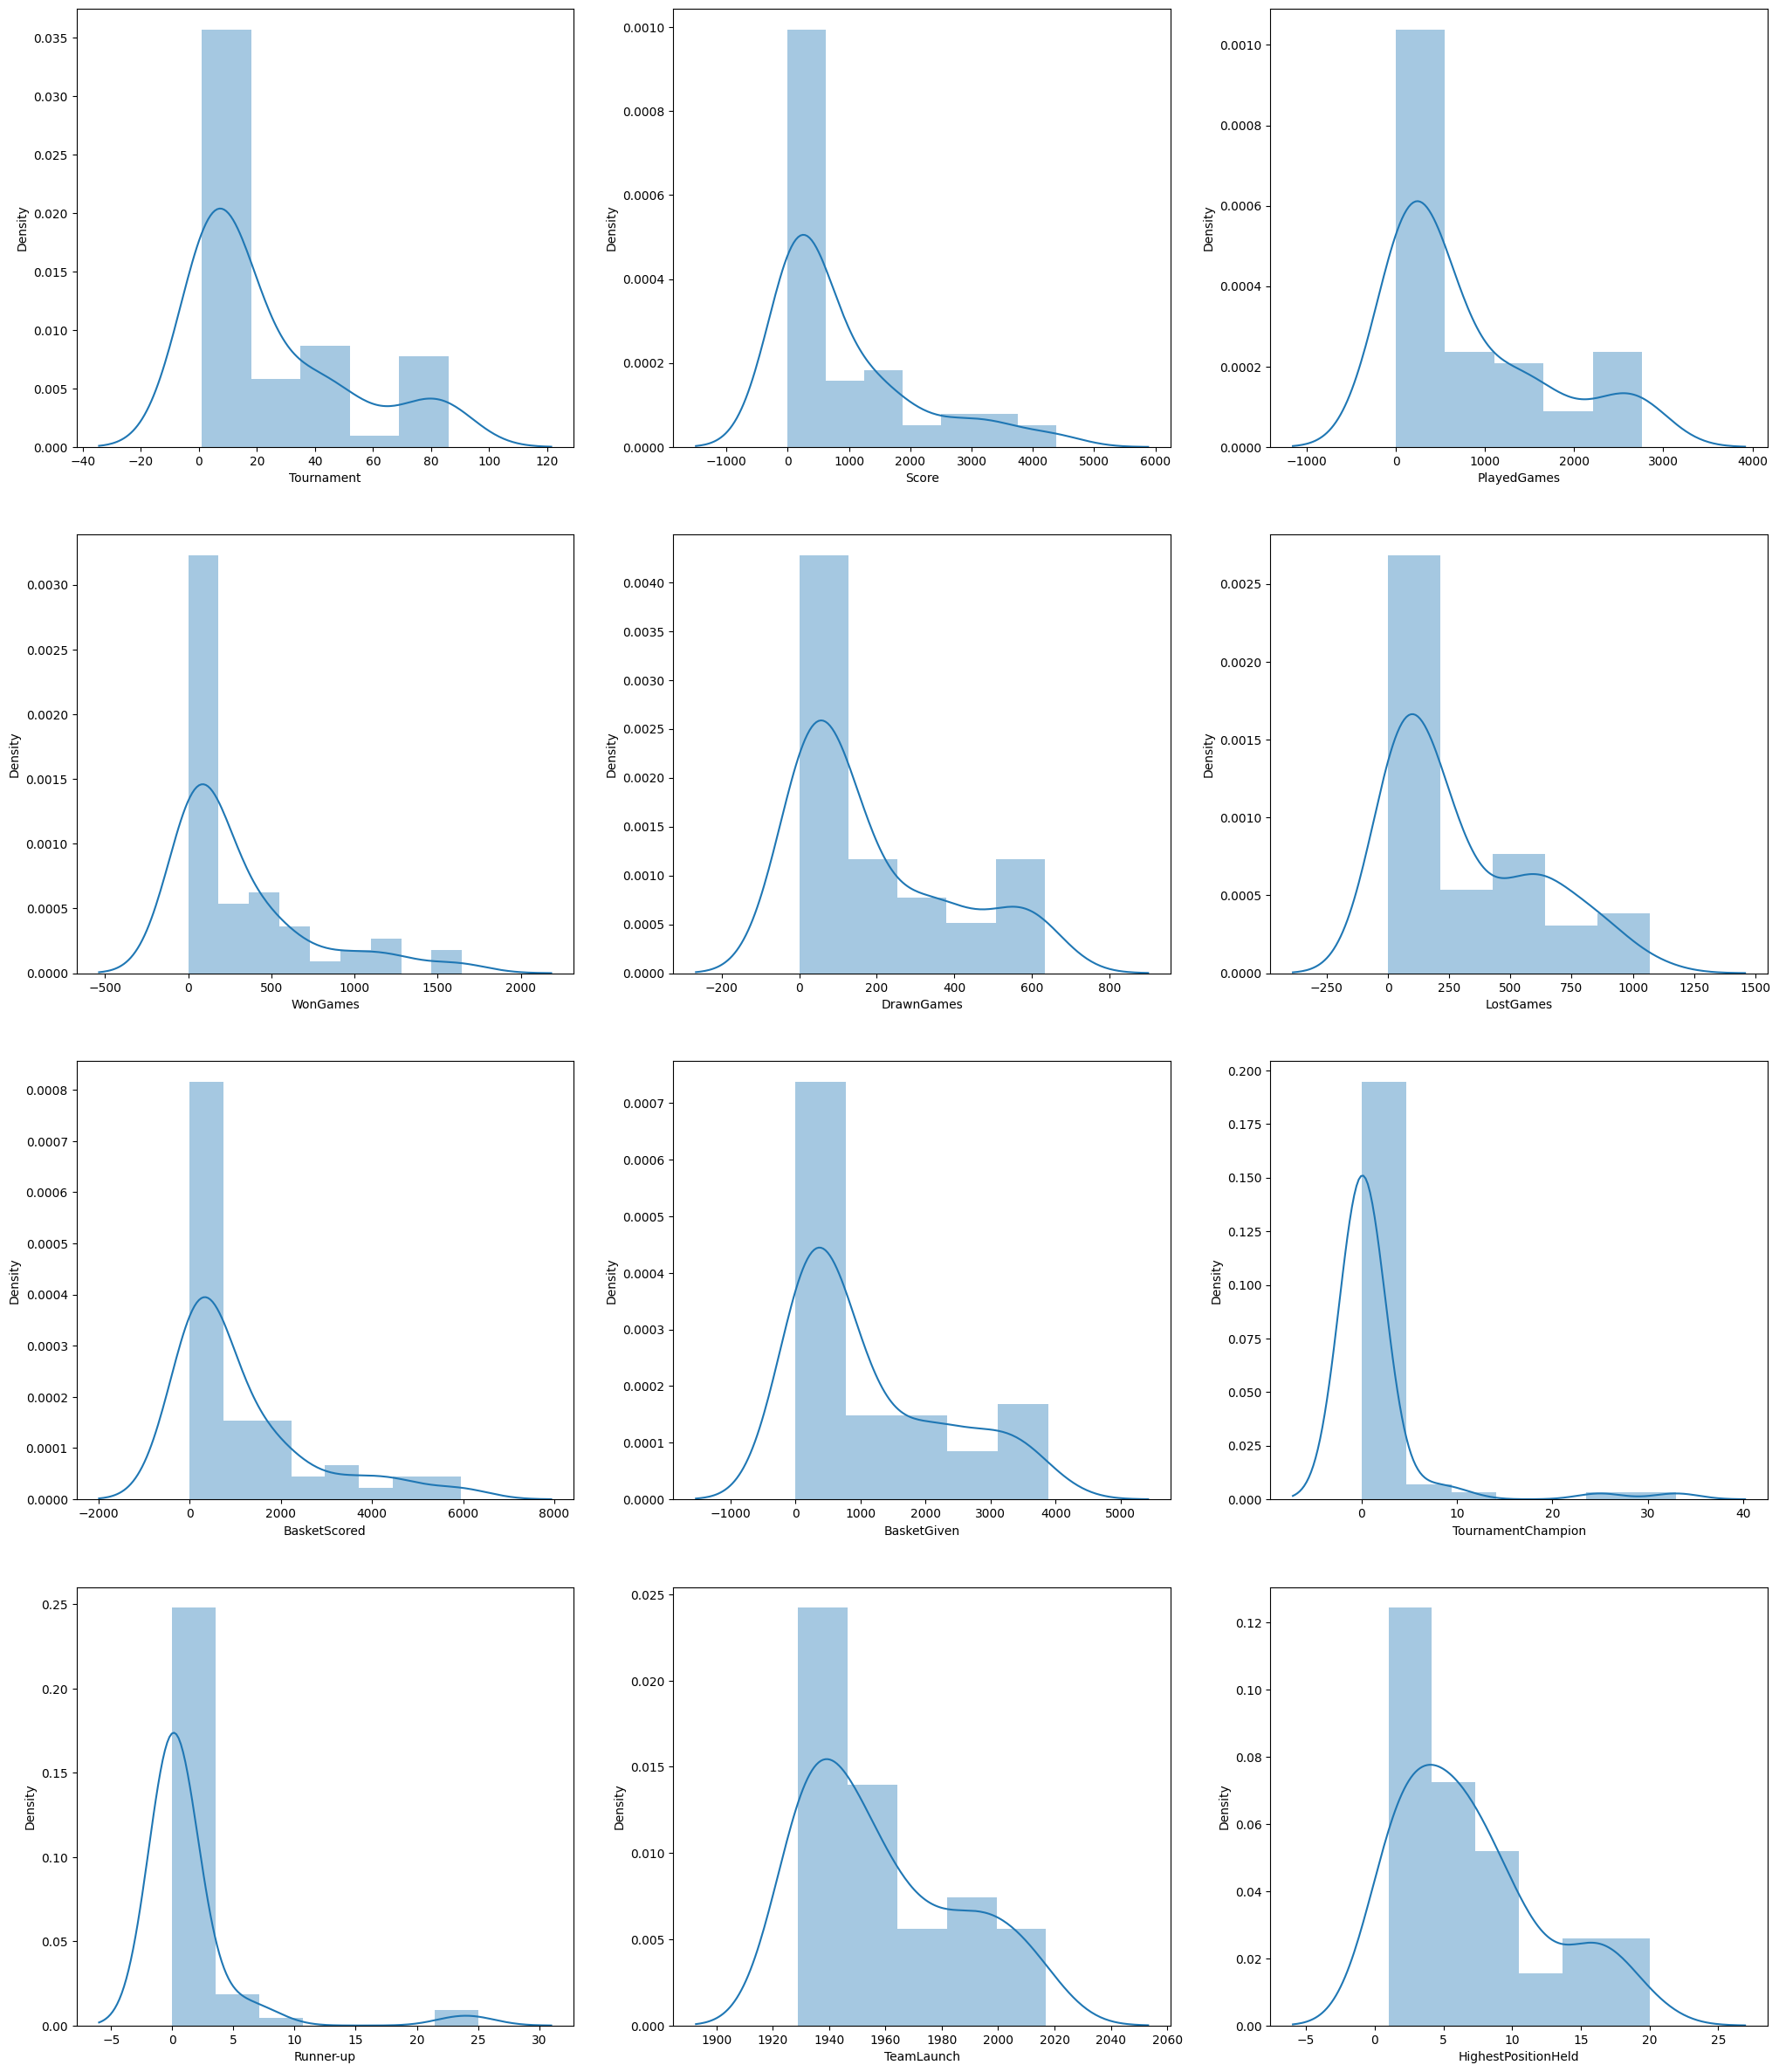

In [56]:
import matplotlib.pyplot as plt
# Define the number of rows and columns you want
n_rows=4
n_cols=3
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25,30))
for i, column in enumerate(df.select_dtypes(exclude='O').columns):
    sns.distplot(df[column],ax=axes[i//n_cols,i%n_cols])

From the above graph it can be depicted that 
- All the column's distribution are positively skewed or right skewed
- Tournament champion and runner up columns are lepto kurtic and all the other columns follows platy kurtic kurtosis

### 1b. Outliers

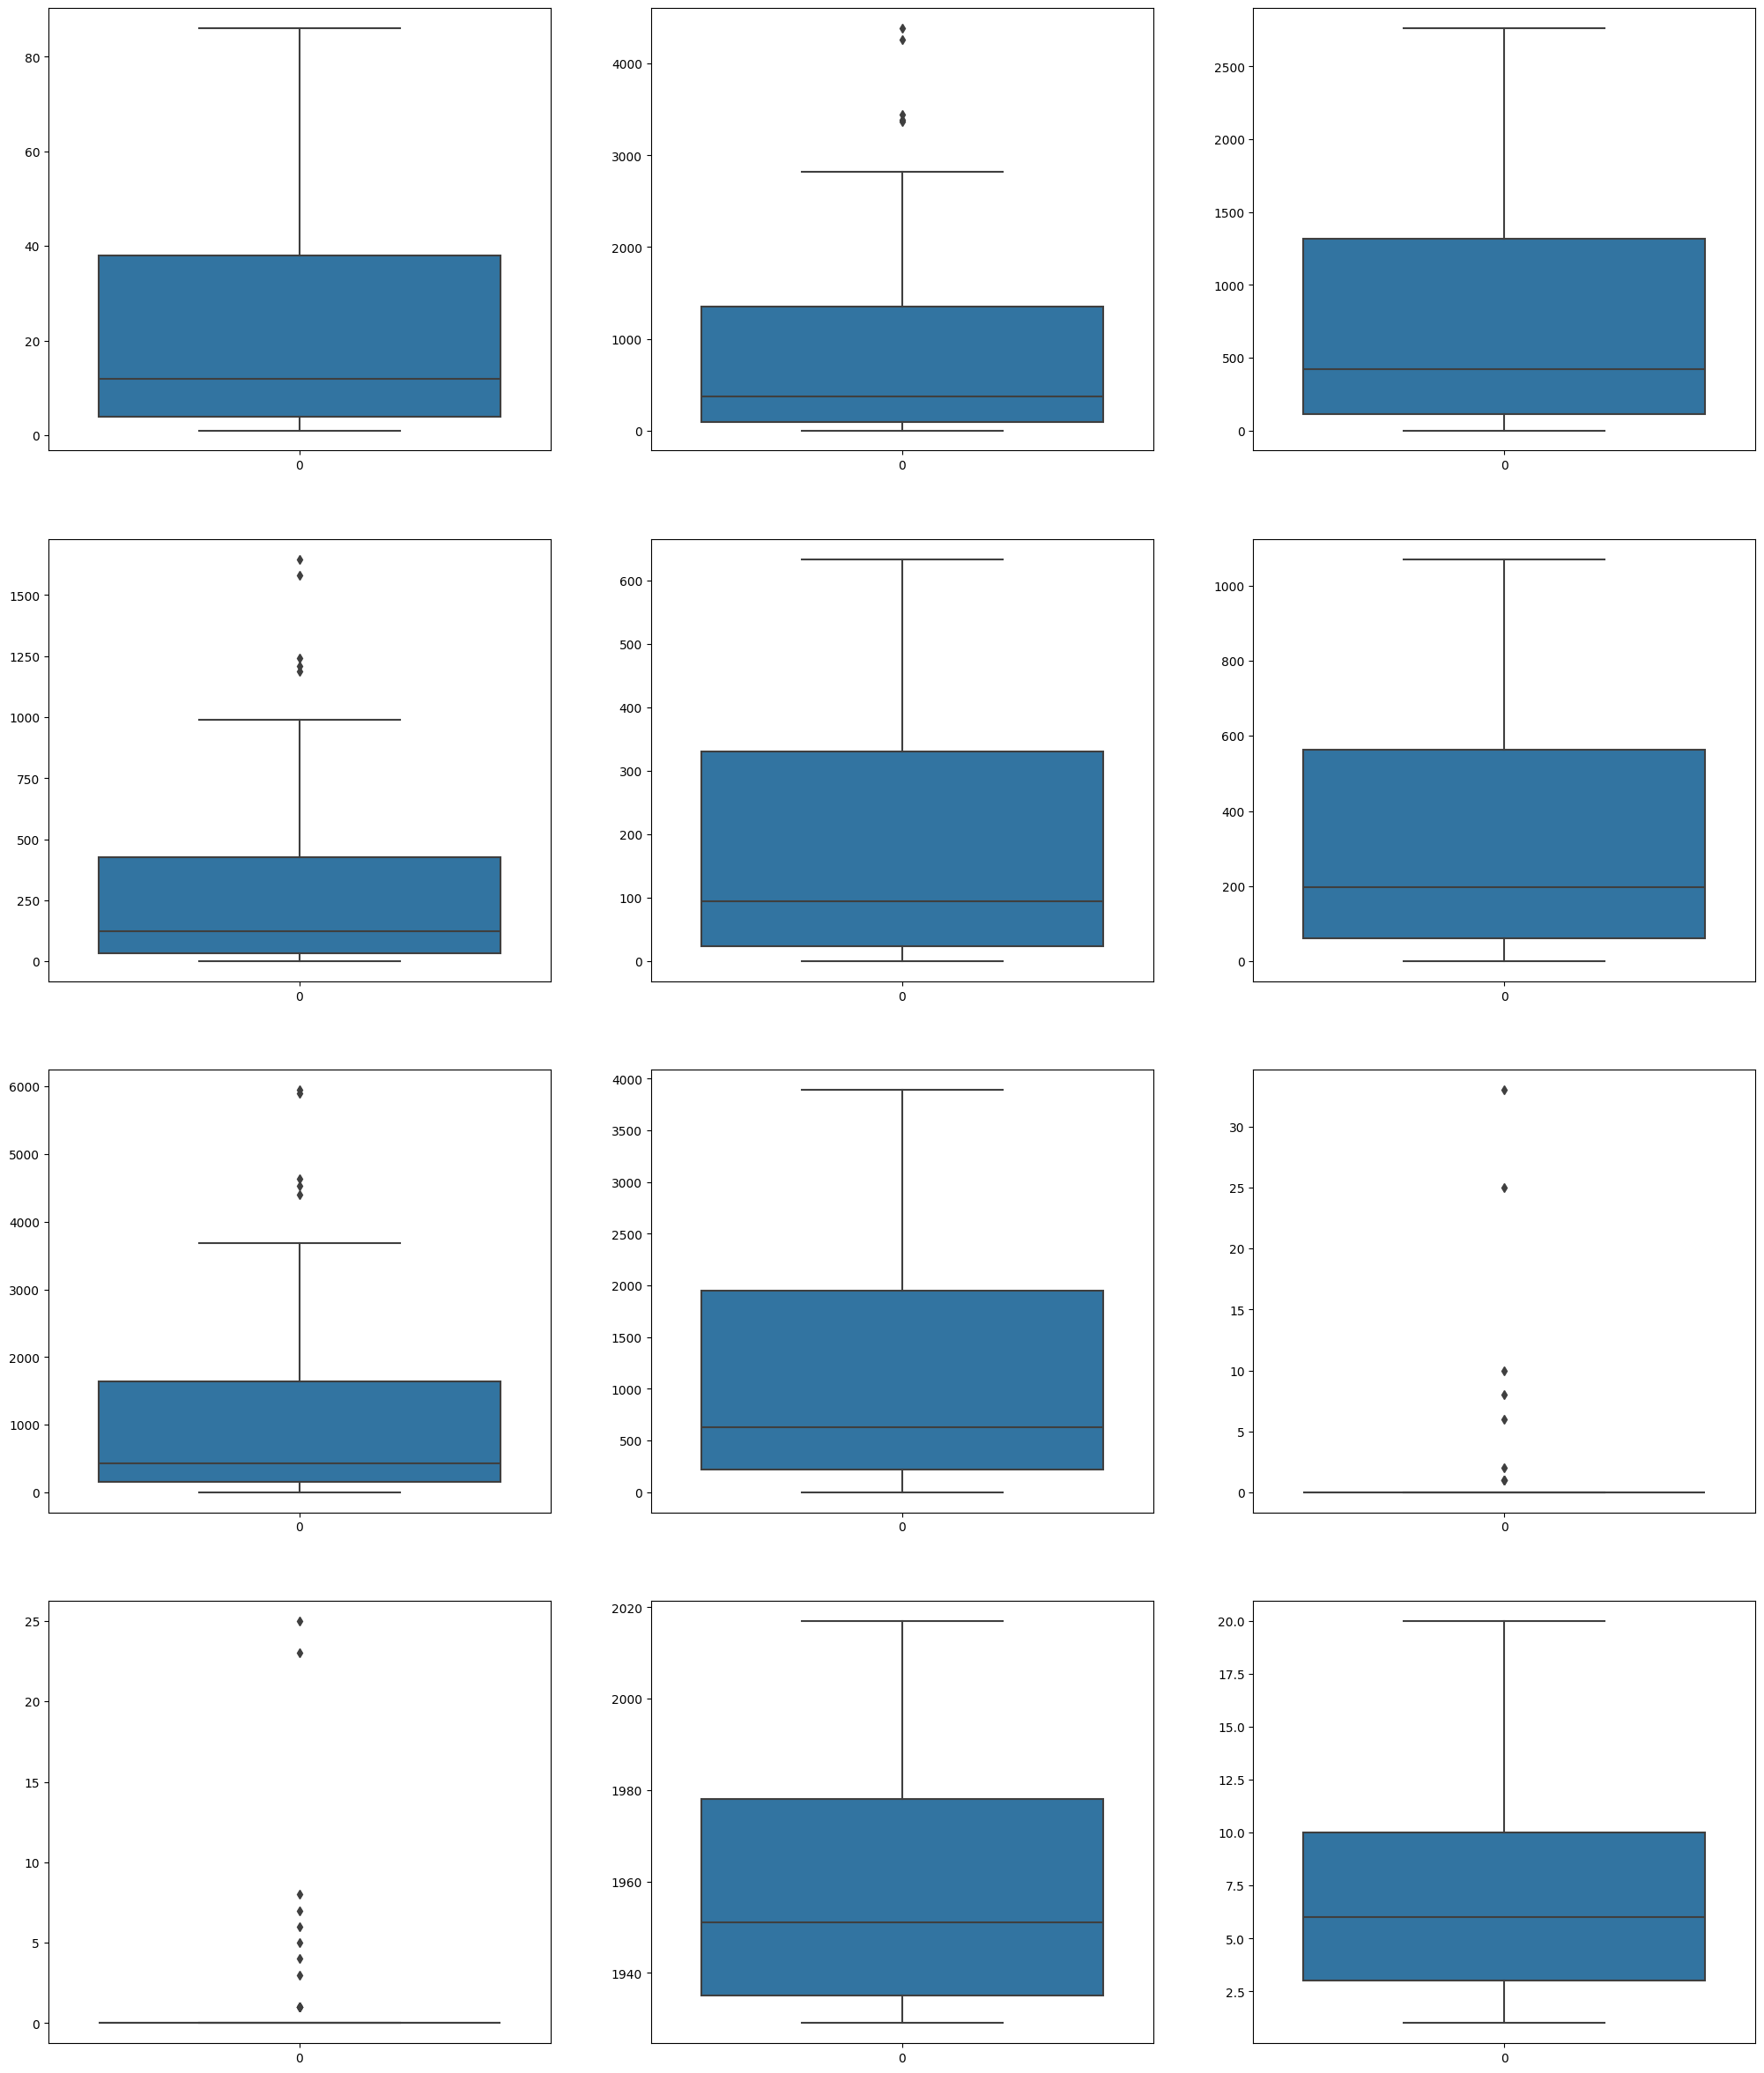

In [57]:
n_rows=4
n_cols=3
p, ax= plt.subplots(n_rows, n_cols, figsize=(25,30))
for i, cols in enumerate(df.select_dtypes(exclude='O').columns):
    sns.boxplot(df[cols], ax=ax[i//n_cols,i%n_cols])

- From the above plotted box plot we can infer that Basket scored, win games and score columns have outliers
- Runner-up and tournament champion columns contain more number of 0's and hence the normal values are considered as outliers

### Feature engineering

In [58]:
# Feature engineering

df['prob_win']=round(df['WonGames']/df['PlayedGames'],2)
df['prob_loss']=round(df['LostGames']/df['PlayedGames'],2)
df['prob_champion']=round(df['TournamentChampion'][df['TournamentChampion']!=0]/df['Tournament'],2)

##  2. Bivariate Analysis
### 2a. Num vs cat

In [59]:
df.select_dtypes(exclude='O').columns

Index(['Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'HighestPositionHeld', 'prob_win',
       'prob_loss', 'prob_champion'],
      dtype='object')

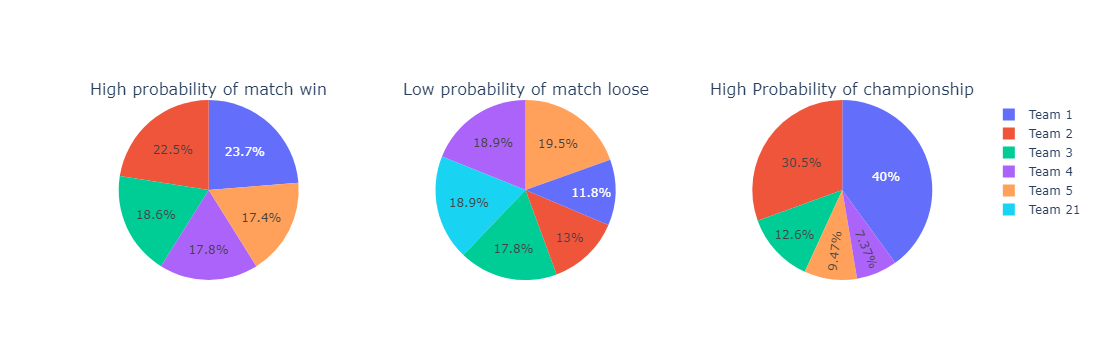

In [60]:
# top 5 well performing teams
import plotly.graph_objects as go
from plotly.subplots import make_subplots
df['prob_win_rank']=df.prob_win.rank(method='dense', ascending=False)
win=df[df['prob_win_rank'] <=5][['Team','prob_win']]

df['prob_loss_rank']=df.prob_loss.rank(method='dense', ascending=True)
loss=df[df['prob_loss_rank'] <=5][['Team','prob_loss']]

df['prob_champ_rank']=df.prob_champion.rank(method='dense', ascending=False)
champ=df[df['prob_champ_rank'] <=5][['Team','prob_champion']]

fig = make_subplots(
   rows=1, cols=3,
   specs=[[
      {"type": "pie"},
      {"type": "pie"},
      {"type": "pie"}]],
    subplot_titles=("High probability of match win", 
                   "Low probability of match loose", "High Probability of championship")
)

# Top performers based on probabilty of winning the match
fig.add_trace(go.Pie(
   values=win['prob_win'],
   labels=win['Team']),
   row=1, col=1
)

# Top performers based on probabilty of loosing the match
fig.add_trace(go.Pie(
   values=loss['prob_loss'],
   labels=loss['Team']),
   row=1, col=2,
)

fig.add_trace(go.Pie(
   values=champ['prob_champion'],
   labels=champ['Team']),
   row=1, col=3
)

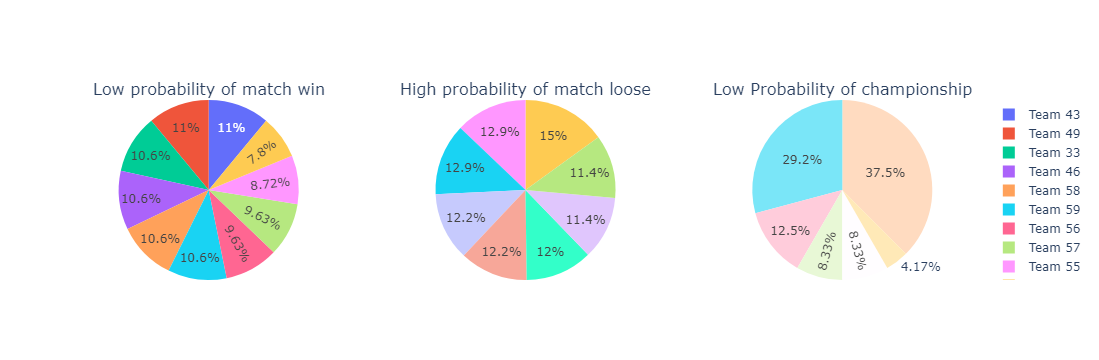

In [61]:
# bottom 5 well performing teams
df['prob_win_rank']=df.prob_win.rank(method='dense', ascending=True)
win=df[df['prob_win_rank'] <=5][['Team','prob_win']]

df['prob_loss_rank']=df.prob_loss.rank(method='dense', ascending=False)
loss=df[df['prob_loss_rank'] <=5][['Team','prob_loss']]

df['prob_champ_rank']=df.prob_champion.rank(method='dense', ascending=True)
champ=df[df['prob_champ_rank'] <=5][['Team','prob_champion']]

fig = make_subplots(
   rows=1, cols=3,
   specs=[[
      {"type": "pie"},
      {"type": "pie"},
      {"type": "pie"}]],
    subplot_titles=("Low probability of match win", 
                   "High probability of match loose", "Low Probability of championship")
)

# Top performers based on probabilty of winning the match
fig.add_trace(go.Pie(
   values=win['prob_win'],
   labels=win['Team']),
   row=1, col=1
)

# Top performers based on probabilty of loosing the match
fig.add_trace(go.Pie(
   values=loss['prob_loss'],
   labels=loss['Team']),
   row=1, col=2,
)

fig.add_trace(go.Pie(
   values=champ['prob_champion'],
   labels=champ['Team']),
   row=1, col=3
)

In [62]:
df['TeamLaunch']=df['TeamLaunch'].astype('O')
df["Level"] = np.arange(-30,31)


In [ ]:
from datetime import datetime
fig, ax = plt.subplots(figsize=(5,10))

ax.plot(df['TeamLaunch'], [0,]* len(df), "-o", color="black", markerfacecolor="white")

ax.set_xticks(pd.date_range("1929", "2017", freq="ys"), range(1929, 2017))
ax.set_xlim(1920,2020)
ax.set_ylim(-30,30)

for idx in range(len(df)):
    dt, product, level = df["TeamLaunch"][idx], df["Team"][idx], df["Level"][idx]
    dt_str = dt
    ax.annotate(str(dt_str) + "\n" + product,xy=(dt, 0.1 if level>0 else -0.1),xytext=(dt, level),
                arrowprops=dict(arrowstyle="-",color="red", linewidth=0.8),
                ha="center")


ax.set_title("Team launch dates", pad=10, loc="left", fontsize=12, fontweight="bold")


In [64]:
# Oldest teams 
df['Launchrank']=df.TeamLaunch.rank(method='dense',ascending=True)
df[df['Launchrank']==1][['Team','TeamLaunch']]

Team TeamLaunch
0    Team 1       1929
1    Team 2       1929
2    Team 3       1929
4    Team 5       1929
6    Team 7       1929
7    Team 8       1929
13  Team 14       1929
44  Team 45       1929
51  Team 52       1929
53  Team 54       1929

In [65]:
# Newly launched teams
df['Launchrank']=df.TeamLaunch.rank(method='dense',ascending=False)
df[df['Launchrank']<=5][['Team','TeamLaunch']]

Team TeamLaunch
36  Team 37       2007
43  Team 44       2014
55  Team 56       2016
56  Team 57       2009
60  Team 61       2017

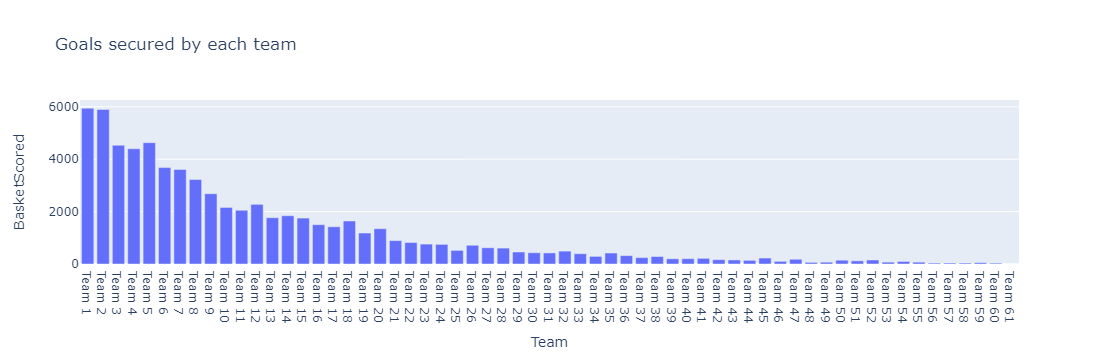

In [66]:
import plotly.express as px
fig = px.bar(df, x="Team", y="BasketScored",  title="Goals secured by each team")
fig.show()

- Team 1 and 2 has scored highest goals with 6000 balls
- Team 1 to 5 can be considered as top performing teams based on goals secured
- The performance of team from 20 to 61 has to be improved because the score is gradually decreasing for the teams and reaches it lowest point from team 53 to 61

In [67]:
# Teams that has acquired top 5 highest positions
df['pos_rank']=df.HighestPositionHeld.rank(method='dense',ascending=True)
df[df['pos_rank']<=3][['Team','HighestPositionHeld']].sort_values(by='HighestPositionHeld')

Team  HighestPositionHeld
0    Team 1                    1
1    Team 2                    1
2    Team 3                    1
3    Team 4                    1
4    Team 5                    1
5    Team 6                    1
7    Team 8                    1
9   Team 10                    1
10  Team 11                    1
19  Team 20                    2
14  Team 15                    2
8    Team 9                    2
20  Team 21                    2
13  Team 14                    2
17  Team 18                    3
18  Team 19                    3
6    Team 7                    3
44  Team 45                    3

- Team 1 to 11 has acquired 1st position as its highest position secured till now and can be considered as best performing teams


In [68]:
# Teams that has acquired bottom 5 positions as their highest position secured till date
df['pos_rank']=df.HighestPositionHeld.rank(method='dense',ascending=False)
df[df['pos_rank']<=3][['Team','HighestPositionHeld']].sort_values(by='HighestPositionHeld', ascending=False)

Team  HighestPositionHeld
56  Team 57                   20
48  Team 49                   19
42  Team 43                   17
47  Team 48                   17
55  Team 56                   17

- Team 56, 48, 43, 49 and 57 perfromance has to be improved since their best position scored till date is considered to be the bottom most positions

## 3. Multivariate

<Axes: >

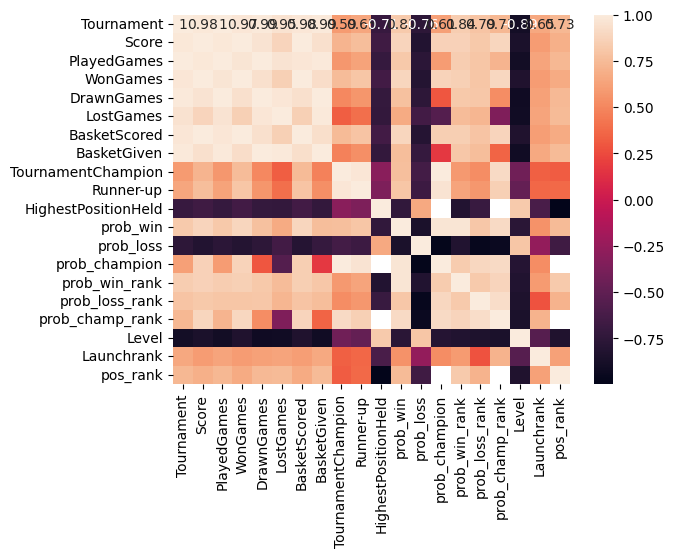

In [70]:
c=df.select_dtypes(include=np.number).corr()
sns.heatmap(c, annot=True)

- Irrespective of any column there exists a strong -ve relationship with HighestPositionHeld with all other columns
- Every other columns have strong +ve correlation with the rest of the columns 

## 4. Transformation

Shapiro test before transformation:  ShapiroResult(statistic=0.7636126279830933, pvalue=1.535072513547675e-08)
Shapiro test before transformation:  ShapiroResult(statistic=0.9674845933914185, pvalue=0.10979475826025009)


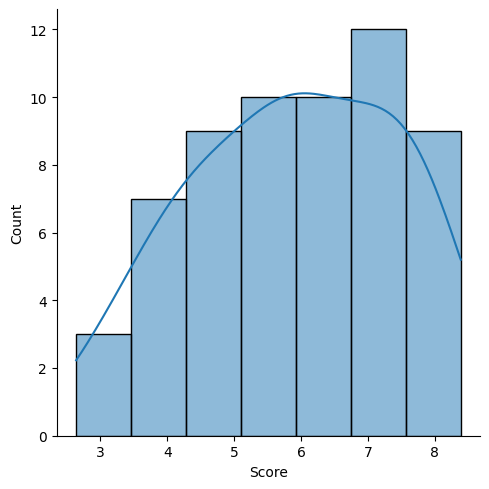

In [71]:
import plotly.express as px
print('Shapiro test before transformation: ',stats.shapiro(df['Score']))
print('Shapiro test before transformation: ',stats.shapiro(np.log(df[df['Score']!=0]['Score'])))
df['Score_norm']=np.log(df[df['Score']!=0]['Score'])
sns.displot(np.log(df[df['Score']!=0]['Score']), kde=True)

Shapiro test before transformation:  ShapiroResult(statistic=0.7343270778656006, pvalue=3.5324441149953145e-09)
Shapiro test before transformation:  ShapiroResult(statistic=0.9662575721740723, pvalue=0.09552758932113647)


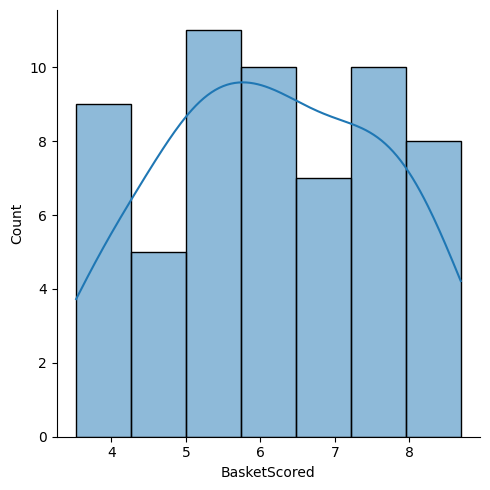

In [72]:
print('Shapiro test before transformation: ',stats.shapiro(df['BasketScored']))
print('Shapiro test before transformation: ',stats.shapiro(np.log(df[df['BasketScored']!=0]['BasketScored'])))
df['BasketScored_norm']=np.log(df[df['BasketScored']!=0]['BasketScored'])
sns.displot(np.log(df[df['BasketScored']!=0]['BasketScored']), kde=True)

Shapiro test before transformation:  ShapiroResult(statistic=0.8297976851463318, pvalue=6.872232916066423e-07)
Shapiro test before transformation:  ShapiroResult(statistic=0.9589609503746033, pvalue=0.03923182561993599)


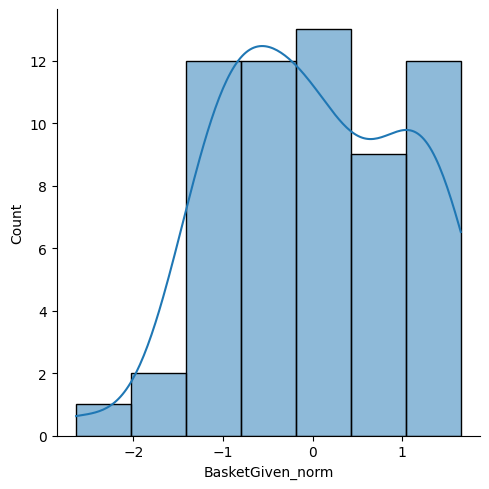

In [73]:
print('Shapiro test before transformation: ',stats.shapiro(df['BasketGiven']))
pt=PowerTransformer(method='yeo-johnson')
df['BasketGiven_norm']=pt.fit_transform(df[['BasketGiven']])
print('Shapiro test before transformation: ',stats.shapiro(df['BasketGiven_norm']))
sns.displot(df['BasketGiven_norm'], kde=True)

## 5. Statistical Analysis

In [74]:
# What is the confidence interval for team's score 95% of the time?
mean=np.mean(df['Score_norm'])
std=np.std(df['Score_norm'])
stats.norm.interval(0.90, loc=mean, scale=std)
print('90% of the time the team would acquire a score between: ', round(np.exp(3.385)),' and ',round(np.exp(8.411)))

90% of the time the team would acquire a score between:  30  and  4496


In [75]:
# Best performers based on scores
s=df.query("Team in ['Team 1', 'Team 2', 'Team 3','Team 4','Team 5']")
mean=np.mean(s['Score_norm'])
std=np.std(s['Score_norm'])
stats.norm.interval(0.90, loc=mean, scale=std)
print('90% of the time the best performing team would acquire a score between: ', round(np.exp(8.032527406176518)),' and ',round(np.exp(8.422162846740134)))

90% of the time the best performing team would acquire a score between:  3080  and  4547


In [76]:
# Least performers based on scores
s=df.query("Team in ['Team 55', 'Team 57', 'Team 60','Team 43','Team 49', 'Team 56', 'Team 59', 'Team 58','Team 46', 'Team 33']")
mean=np.mean(s['Score_norm'])
std=np.std(s['Score_norm'])
stats.norm.interval(0.90, loc=mean, scale=std)
print('90% of the time the worst performing team would acquire a score between: ', round(np.exp(2.354860501511201)),' and ',round(np.exp(5.492912872374772)))

90% of the time the worst performing team would acquire a score between:  11  and  243


In [77]:
# What is the confidence interval for team's Basket score 95% of the time?
mean=np.mean(df['BasketScored_norm'])
std=np.std(df['BasketScored_norm'])
stats.norm.interval(0.90, loc=mean, scale=std)
print('90% of the time the team would acquire basket score between: ', round(np.exp(3.756142577803641)),' and ',round(np.exp(8.546036180295399)))

90% of the time the team would acquire basket score between:  43  and  5146


In [78]:
# Best performers based on Basket score
s=df.query("Team in ['Team 1', 'Team 2', 'Team 3','Team 4','Team 5', 'Team 21']")
mean=np.mean(s['BasketScored_norm'])
std=np.std(s['BasketScored_norm'])
stats.norm.interval(0.90, loc=mean, scale=std)
print('90% of the time the best performing team would acquire a score between: ', round(np.exp(7.1560821269968695)),' and ',round(np.exp(9.315787553284245)))

90% of the time the best performing team would acquire a score between:  1282  and  11112


In [79]:
# Least performers based on basket scores
s=df.query("Team in ['Team 59', 'Team 55', 'Team 60','Team 57','Team 51', 'Team 54', 'Team 50', 'Team 47']")
mean=np.mean(s['BasketScored_norm'])
std=np.std(s['BasketScored_norm'])
stats.norm.interval(0.90, loc=mean, scale=std)
print('90% of the time the worst performing team would acquire a score between: ', round(np.exp(3.4000229006958755)),' and ',round(np.exp(5.322477063529813)))

90% of the time the worst performing team would acquire a score between:  30  and  205


### Conclusion

- From the above graphs and statistical analysis, it can be depicted that investing in team 1, 2, 3, 4 and 5 can lead to a deal win and the performance rate of these teams based on score, number of matches played, basket scored is high compared to other teams. 
- These teams has also acquired its highest position till date as 1st position
- These teams are the oldest teams that has been launched. Hence they would have experienced all kinds of scenerios

- The data is summarical view of each team. More analysis cannot be done with this
- Each team's individual play can be collected so that consistency of each team could have been ,easured
- If collecting each team's invidual play record for a series of match is not possible then, the top performing team's play record would be enough to analysis their match performance
- Each player's individual data in a team can be provided to know the strength and weakness of the whole team and can be analysed to know the area to be considered for strengthening the team
- Time series data would have helped predict the play of all the team in future based on historical data
- The data collected is old or historical data. Newest data could have been added to be updated on the team’s improved or depreciated performance
- There were some noises or outliers and unusual being present in the data. Those things could have been avoided and the more accurate data can be provided
- The reason for each team’s loosing the match or winning the match can be added to analyse the circumstances of each team and its performance